In [8]:
import pandas as pd
import re
import string
import os
from nltk.tokenize import TweetTokenizer
import nltk
%matplotlib inline
import pylab as pl
tknzr = TweetTokenizer()

In [9]:
os.listdir('/home/ds/notebooks/Data')

['Training50_winedata.csv',
 'train.csv',
 'sample.csv',
 '.ipynb_checkpoints',
 'retention.csv',
 'twitterAccounts_officialbrands.csv',
 'twitterTweets.csv',
 'FLU_Challenge_vietnam.csv',
 'superbowl.csv',
 'officialbrands.csv',
 'tweets.csv',
 'twitterhandles.csv',
 'twitterAccounts_2.csv',
 'FLU_Challenge_HA_chicken.csv',
 '2016_05_05_tweets.csv']

In [94]:
format(user, tweet['user_id'], 
       tweet['user_screen_name'], 
       tweet['user_name'], 
       tweet['retweets'], 
       tweet['favorites'], 
       tweet['tweet_id'], 
       t.strftime(self.fmt), textVal))

SyntaxError: invalid syntax (<ipython-input-94-12527b307b1e>, line 7)

In [10]:
columns=['value','twitterhandle','userid','user_screen_name','retweets','favorites','tweet_id','timestamp','tweet']
df=pd.read_csv('/home/ds/notebooks/Data/twitterTweets.csv',sep='\t',names=columns,encoding='utf-8')

In [11]:
len(df)

259993

In [5]:
from string import printable
#new_string = ''.join(char for char in the_string if char in printable)
def remove_punctuation(s):
    """?!.$%^
    """
    exclude = set(string.punctuation)
    new_string = ''.join(char for char in s if char in printable)
    return ''.join(ch for ch in new_string if ch not in exclude)
def tokenize(row):
    try:
        message = str(row['tweet'].decode('utf8'))
        return tknzr.tokenize(message)
    except:
        pass

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
df['tokens'] = df.apply (lambda row: tokenize (row),axis=1)

In [90]:
def count_words(words):
    wc = {}
    for word in words:
        wc[word] = wc.get(word, 0.0) + 1.0
    return wc

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
df['tokens'][:4]

0                                 [@JaffeKayla, @Dory]
1                                                 None
2                                                 None
3    [@autumn_holmess, I, SENT, THAT, TO, EVERYONE,...
Name: tokens, dtype: object

In [14]:
df2.rename(columns={'Handle': 'value'}, inplace=True)

In [13]:
df2=pd.read_csv('/home/ds/notebooks/Data/twitterhandles.csv',encoding='utf-8')

In [15]:
df3=pd.merge(df, df2, on='value', how='inner')

In [16]:
df3.groupby('Gender').size()

Gender
F    210926
M     16183
dtype: int64

In [17]:
df4=df3.groupby(['value','Gender','Age']).agg({'timestamp':'count'})

In [18]:
df4=df4.reset_index()

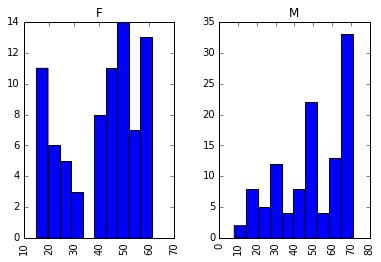

In [19]:
df4.hist(column='Age',by='Gender')
pl.show()

In [20]:
df3.groupby(['Gender']).agg({'Age':['size','mean']})

Age           
          size       mean
Gender                   
F       210926  25.104994
M        16183  39.341593

In [17]:
df3[['value','Age']].head()

,value,Age
0,@itsavlol,15
1,@itsavlol,15
2,@itsavlol,15
3,@itsavlol,15
4,@itsavlol,15


In [21]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df3['age_group'] = pd.cut(df3.Age, range(0, 81, 10), right=False, labels=labels)
#df3[['age', 'age_group']].drop_duplicates()[:10]

In [22]:
df5=df3.groupby(['value','Age','age_group','Gender']).agg({'timestamp':'count'}).reset_index()

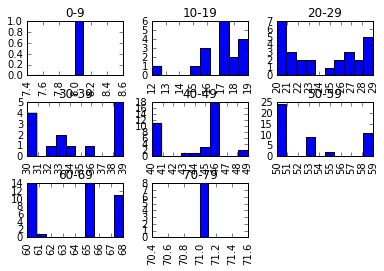

In [23]:
df5.hist(column='Age',by='age_group')
pl.show()

In [24]:
df5.groupby(['age_group','Gender']).agg({'timestamp':['size','mean']})

timestamp              
                      size          mean
age_group Gender                        
0-9       M              1   1759.000000
10-19     F             11  11653.181818
          M              6    212.833333
20-29     F             13   1865.000000
          M             14    142.928571
30-39     F              4   3960.250000
          M             10    401.700000
40-49     F             17   2251.411765
          M             19     42.368421
50-59     F             25    138.040000
          M             21    130.380952
60-69     F              8    116.250000
          M             32     86.750000
70-79     M              8    101.250000

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer().fit(df3['tweet'])

In [28]:
df3.columns

Index([           u'value',    u'twitterhandle',           u'userid',
       u'user_screen_name',         u'retweets',        u'favorites',
               u'tweet_id',        u'timestamp',            u'tweet',
                 u'Gender',              u'Age',        u'age_group'],
      dtype='object')

In [26]:
df3=df3.dropna()

In [29]:
df3['tweet'].count()

226940

In [27]:
df3.shape

(226940, 12)

In [31]:
messages_bow = bow_transformer.transform(df3['tweet'])
print 'sparse matrix shape:', messages_bow.shape
print 'number of non-zeros:', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

sparse matrix shape: (226940, 148326)
number of non-zeros: 2250472
sparsity: 0.01%


In [32]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(messages_bow)
messages_tfidf = tfidf_transformer.transform(messages_bow)
print messages_tfidf.shape

(226940, 148326)


In [33]:
df3['age_group'].dropna().shape

(226940,)

In [34]:
from sklearn.naive_bayes import MultinomialNB
%time spam_detector = MultinomialNB().fit(messages_tfidf, df3['age_group'].dropna())

CPU times: user 789 ms, sys: 5.41 ms, total: 795 ms
Wall time: 817 ms


In [35]:
all_predictions = spam_detector.predict(messages_tfidf)
print all_predictions[:10]

['10-19' '10-19' '10-19' '10-19' '10-19' '10-19' '10-19' '10-19' '10-19'
 '10-19']


In [40]:
pd.DataFrame(all_predictions).groupby(0).size()

0
0-9        1109
10-19    169766
20-29     13494
30-39     10615
40-49     30100
50-59      1360
60-69       481
70-79        15
dtype: int64